<a href="https://colab.research.google.com/github/tehila-ashlag/AI/blob/main/visualizing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

start_i : 0
end_i : 28
start_i : 36
end_i : 44
start_i : 48
end_i : 88
start_i : 454
end_i : 470
start_i : 474
end_i : 498
start_i : 976
end_i : 984
start_i : 1999
end_i : 2007
start_i : 3381
end_i : 3389
start_i : 4063
end_i : 4115
start_i : 4332
end_i : 4340
start_i : 4866
end_i : 4874
start_i : 28
end_i : 36
start_i : 381
end_i : 393
start_i : 442
end_i : 454
start_i : 590
end_i : 618
start_i : 626
end_i : 650
start_i : 695
end_i : 719
start_i : 735
end_i : 751
start_i : 755
end_i : 771
start_i : 799
end_i : 859
start_i : 936
end_i : 976
start_i : 992
end_i : 1036
start_i : 1084
end_i : 1112
start_i : 1148
end_i : 1192
start_i : 1437
end_i : 1465
start_i : 1469
end_i : 1477
start_i : 1943
end_i : 1991
start_i : 2007
end_i : 2023
start_i : 2108
end_i : 2136
start_i : 2148
end_i : 2168
start_i : 2224
end_i : 2252
start_i : 2284
end_i : 2292
start_i : 2305
end_i : 2317
start_i : 2321
end_i : 2365
start_i : 2449
end_i : 2477
start_i : 2606
end_i : 2634
start_i : 2658
end_i : 2674
start_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{
    "(4294958, 4295004, 4295003, 4295004)": {
        "general_counter": 11,
        "indexes_and_cycle_length": [
            [
                0,
                28,
                4,
                8
            ],
            [
                36,
                44,
                4,
                3
            ],
            [
                48,
                88,
                4,
                11
            ],
            [
                454,
                470,
                4,
                5
            ],
            [
                474,
                498,
                4,
                7
            ],
            [
                976,
                984,
                4,
                3
            ],
            [
                1999,
                2007,
                4,
                3
            ],
            [
                3381,
                3389,
                4,
                3
            ],
            [
       

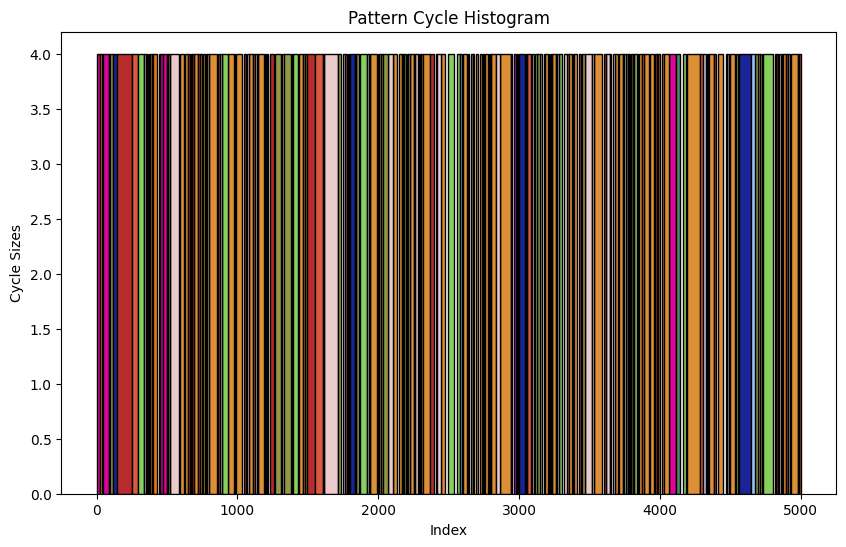

In [15]:
import numpy as np
import pandas as pd
from collections import defaultdict
import json

# קריאת הנתונים מהקובץ
file_path = "sequences_lengths.csv"
data = pd.read_csv(file_path)

# המרת העמודה השנייה למערך NumPy
sequences_lengths = data.iloc[:, 1].astype(int)
original_numbers = np.array(sequences_lengths)

# הגדרת מילון עם מבנה נתונים משופר
patterns_dict = defaultdict(lambda: {"general_counter": 0, "indexes_and_cycle_length": []})

def find_patterns(sequence, min_pattern_size=3, max_pattern_size=5):
    i = 0
    windows = []

    while i < 5000:
        found_pattern = False

        for pattern_size in range(min_pattern_size, max_pattern_size + 1):
            if i + pattern_size * 2 <= len(sequence):
                pattern = sequence[i:i + pattern_size]
                next_pattern = sequence[i + pattern_size:i + 2 * pattern_size]

                if np.all(pattern == next_pattern):
                    window = []
                    cycle_count = 1
                    start_idx=i

                    while i + pattern_size <= len(sequence) and np.all(sequence[i:i + pattern_size] == pattern):
                        window.extend(sequence[i:i + pattern_size])
                        i += pattern_size
                        cycle_count += 1

                    windows.append(window)

                    pattern_tuple = tuple(pattern)
                    patterns_dict[pattern_tuple]["general_counter"] += 1
                    end_idx=i
                    cycle_size=pattern_size
                    patterns_dict[pattern_tuple]["indexes_and_cycle_length"].append((start_idx,end_idx,cycle_size, cycle_count))

                    found_pattern = True
                    break  # יציאה מהלולאה הפנימית אחרי מציאת מחזור

        if not found_pattern:
            windows.append([sequence[i]])
            i += 1

    return windows

# הרצת החיפוש
windows = find_patterns(original_numbers)

# הצגת התוצאות
# for i, window in enumerate(windows):
#     print(f"Window {i + 1}, Size {len(window)}: {window}")

# הדפסת המילון לקובץ
# with open("patterns_output.json", "w") as f:
# print(json.dumps(patterns_dict, indent=4))

import matplotlib.pyplot as plt
import numpy as np
# יצירת רשימה של כל האינדקסים והערכים
start_indexes = []
# counts = []
cycle_sizes=[]
colors = []
widths=[]
# צביעה אוטומטית עבור כל מחזור מתוך הkeys
# color_map = plt.cm.get_cmap('tab10', len(patterns_dict))  # יצירת צבעים אוטומטיים לפי כמות התבניות
# מלא את המידע
from random import randint
colors = []

for idx, (pattern, data) in enumerate(patterns_dict.items()):
    pattern_color=(randint(0, 255)/255, randint(0, 255)/255, randint(0, 255)/255,1)
    for pattern_idx, (start_idx,end_idx,cycle_size, count) in enumerate(data["indexes_and_cycle_length"]):
        colors.append(pattern_color)
        print(f"start_i : {start_idx}")
        start_indexes.append(start_idx)
        # counts.append(count)
        cycle_sizes.append(cycle_size)
        print(f"end_i : {end_idx}")
        widths.append(end_idx-start_idx)
        # colors.append(color_map(idx))  # צבע עבור כל מחזור בהתבסס על אינדקס התבנית

print(start_indexes)
cycles=len(start_indexes)

print(start_indexes)
print(colors)
# הגדרת גרף
plt.figure(figsize=(10,6))
print(start_indexes)
# for i in range(0, len(start_indexes), 1000):
#     print(len(start_indexes), len(counts), len(widths))  # Check if they are the same length
#     print(type(start_indexes), type(counts), type(widths))  # Ensure they are NumPy arrays or lists
#     print(len(start_indexes[i:i+1000]), len(counts[i:i+1000]), len(widths[i:i+1000]))  # Check the actual values
    # plt.bar(start_indexes[i:i+1000], counts[i:i+1000], width=widths[i:i+1000])
    # plt.show()
# יצירת ההיסטוגרמה (scatter או bar plot)
plt.bar(start_indexes, cycle_sizes, color=colors, width=widths, edgecolor='black',align='edge')
# for (start, end), count, color in zip(indexes, counts, colors):
#     plt.bar(x=start, height=count, width=end-start, color=color, edgecolor='black', alpha=1)

# הוספת תוויות
plt.xlabel('Index')
plt.ylabel('Cycle Sizes')
plt.title('Pattern Cycle Histogram')
import datetime
# יצירת שם קובץ עם תאריך נוכחי
current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"plot_{current_date}.png"

# שמירת הגרף עם התאריך בשם הקובץ
plt.savefig(filename)
from google.colab import files
files.download(filename)  # מוריד את הקובץ

import json

# המרת המילון לפורמט שה-json תומך בו
patterns_dict_json = {str(k): v for k, v in patterns_dict.items()}

# הדפסת המילון או שמירתו לקובץ
print(json.dumps(patterns_dict_json, indent=4))



